<a href="https://colab.research.google.com/github/Harsh1091996/Global-Terrorism-Analysis/blob/main/Himanshu_Sharma_24_02_2021_%5BABTN0102%5DGlobal_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Abstract: 
With details on various dimensions of each attack, the GTD familiarizes analysts, policymakers, scholars, and journalists with patterns of terrorism. The GTD defines terrorist attacks as: The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
global_terror=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project/Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
global_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Renaming all columns according to our convinience 

In [ ]:
global_terror.rename(columns={'iyear':'Year','imonth':'Month','city':'City',
                   'iday':'Day','country':'Country_Code','country_txt':'Country_Name','region':'No_of_regions','region_txt':'Region',
                   'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                   'nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                   'motive':'Motive'},inplace=True)


In [ ]:
#Introducing new column i.e Casualities
global_terror['Casualities'] = global_terror.Killed + global_terror.Wounded
global_terror=global_terror[['eventid','Year','Month','Day','Country_Code','Country_Name','extended','resolution','No_of_regions','Region','provstate','City','latitude',
                             'longitude','success','AttackType','Killed','Wounded','Casualities',
                             'Target','Group','Target_type','Weapon_type','ishostkid','Summary']]

In [ ]:
global_terror.head()

,eventid,Year,Month,Day,Country_Code,Country_Name,extended,resolution,No_of_regions,Region,provstate,City,latitude,longitude,success,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type,ishostkid,Summary
0,197000000001,1970,7,2,58,Dominican Republic,0,NaN,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,0.0,NaN
1,197000000002,1970,0,0,130,Mexico,0,NaN,1,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,1.0,NaN
2,197001000001,1970,1,0,160,Philippines,0,NaN,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown,0.0,NaN
3,197001000002,1970,1,0,78,Greece,0,NaN,8,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,0.0,NaN
4,197001000003,1970,1,0,101,Japan,0,NaN,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,0.0,NaN


Treating Nulll Values

In [ ]:
global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventid        181691 non-null  int64  
 1   Year           181691 non-null  int64  
 2   Month          181691 non-null  int64  
 3   Day            181691 non-null  int64  
 4   Country_Code   181691 non-null  int64  
 5   Country_Name   181691 non-null  object 
 6   extended       181691 non-null  int64  
 7   resolution     2220 non-null    object 
 8   No_of_regions  181691 non-null  int64  
 9   Region         181691 non-null  object 
 10  provstate      181270 non-null  object 
 11  City           181257 non-null  object 
 12  latitude       177135 non-null  float64
 13  longitude      177134 non-null  float64
 14  success        181691 non-null  int64  
 15  AttackType     181691 non-null  object 
 16  Killed         171378 non-null  float64
 17  Wounded        165380 non-nul

#### Analyzing Null Values

In [ ]:
global_terror.isnull().sum()

eventid               0
Year                  0
Month                 0
Day                   0
Country_Code          0
Country_Name          0
extended              0
resolution       179471
No_of_regions         0
Region                0
provstate           421
City                434
latitude           4556
longitude          4557
success               0
AttackType            0
Killed            10313
Wounded           16311
Casualities       16874
Target              636
Group                 0
Target_type           0
Weapon_type           0
ishostkid           178
Summary           66129
dtype: int64

Killed,Wounded,Casualities,ishostkid these are the columns whose NaN values can be filled with zero 

In [ ]:
global_terror['Killed'].fillna(0,inplace=True)
global_terror['Wounded'].fillna(0,inplace=True)
global_terror['Casualities'].fillna(0,inplace=True)
global_terror['ishostkid'].fillna(0,inplace=True)

#Information that can help us better understand the data and find some basic insights

In [ ]:
# Region with most number  of terror attacks
print('The region of',global_terror['Region'].value_counts(dropna=True, ascending=False).index[0] , 'had the highest amount of Terrorist Attacks totalled at',global_terror['Region'].value_counts(dropna=True,  ascending=False).max(),'\n')

# Country with most number  of terror attacks
print('The most known country with terror attacks was' ,global_terror['Country_Name'].value_counts( ascending=False).index[0],'totalled at',global_terror['Country_Name'].value_counts( ascending=False).max(),'\n')

# City with most number  of terror attacks
print('The most known city that had terror attacks was' ,global_terror['City'].value_counts(dropna=True, ascending=False).index[1],'\n')

# weapon used mostly
print('The most used weapon in terror attacks was' ,global_terror['Weapon_type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalled at',global_terror['Weapon_type'].value_counts(dropna=True, normalize=False, ascending=False).max(),'\n')

# most preferred method of attacking
print('The most preferred method of attack was',global_terror['AttackType'].value_counts(dropna=True,ascending=False).index[0],'totalling at',global_terror['AttackType'].value_counts(dropna=True,  ascending=False).max())

The region of Middle East & North Africa had the highest amount of Terrorist Attacks totalled at 50474 

The most known country with terror attacks was Iraq totalled at 24636 

The most known city that had terror attacks was Baghdad 

The most used weapon in terror attacks was Explosives totalled at 92426 

The most preferred method of attack was Bombing/Explosion totalling at 88255


#Number Of Terrorist Activities Each Year

In [78]:
# Counting terror activities each year
attack_count=global_terror.groupby('Year')['eventid'].count()
# Counting No of people killed each year
killed=global_terror.groupby('Year')['Killed'].sum()
# Counting No of people Injured each year
injured=global_terror.groupby('Year')['Wounded'].sum()

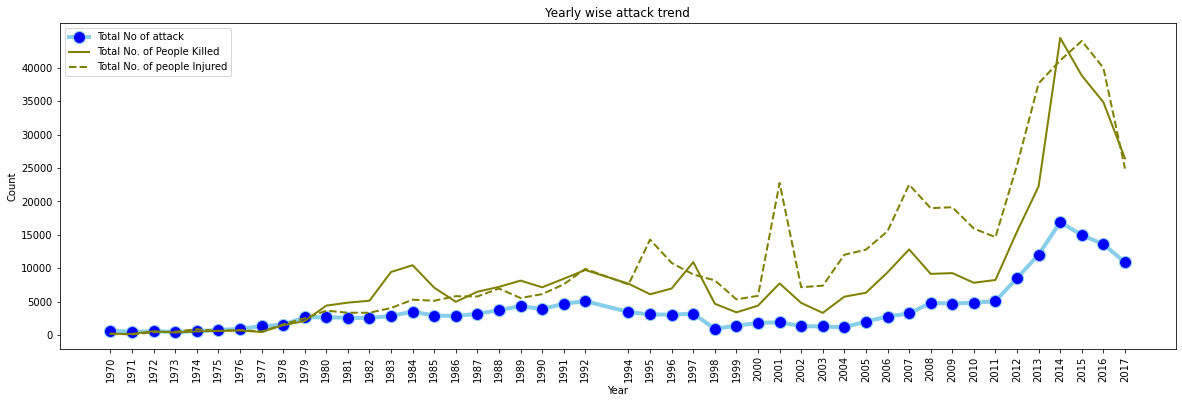

In [88]:
plt.subplots(figsize=(20,6))
plt.plot( attack_count.index,attack_count.values , marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='Total No of attack')
plt.plot( killed.index, killed.values, marker='', color='olive', linewidth=2,label='Total No. of People Killed')
plt.plot( injured.index, injured.values, marker='', color='olive', linewidth=2, linestyle='dashed',label='Total No. of people Injured')
plt.xticks(rotation=90)
plt.xticks(attack_count.index)
plt.yticks(range(0,41000,5000))
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.title('Yearly wise attack trend')
plt.show()

#Total Numbers of attack in top 10 Terror Attack Country

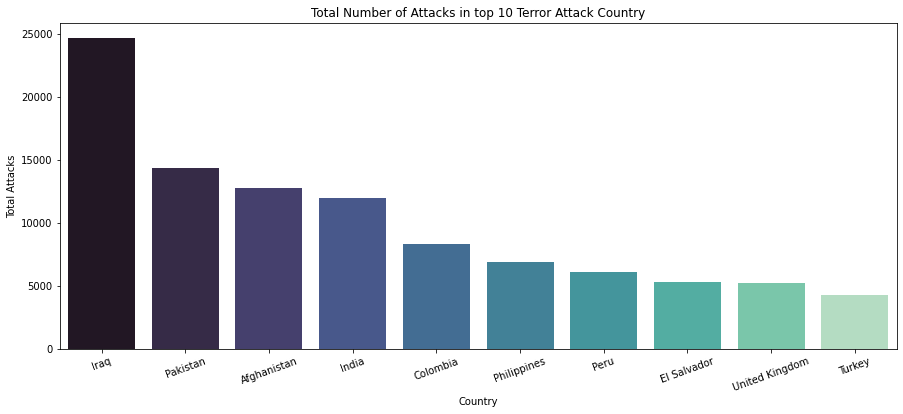

In [ ]:
plt.subplots(figsize=(15,6))
country = global_terror.Country_Name.value_counts()[:10].reset_index()
country.columns = ['Country', 'Total Attacks']
sns.barplot(x=country.Country, y=country['Total Attacks'], palette= 'mako')
plt.xticks(rotation=20)
plt.title('Total Number of Attacks in top 10 Terror Attack Country')
plt.show()

#Number of Total Casualities in Top 10 Terror Attack Country

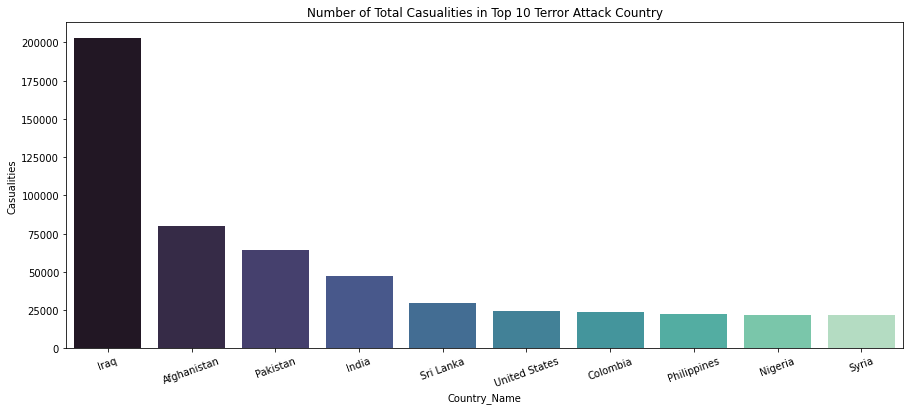

In [ ]:
plt.subplots(figsize=(15,6))
Casualities = global_terror.groupby('Country_Name').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:10]
sns.barplot(x=Casualities.Country_Name, y=Casualities.Casualities, palette= 'mako')
plt.xticks(rotation=20)
plt.title('Number of Total Casualities in Top 10 Terror Attack Country')
plt.show()

# Visualizing Parts of world Most targetted

In [50]:
geog1 = global_terror.head(3000)

In [55]:
fig = px.scatter_mapbox(geog1, lat='latitude', lon='longitude', hover_name="City", hover_data=['Year','Weapon_type','Casualities','provstate','Group','success'],
                        color_discrete_sequence=["#ffae42 "], zoom=1, height=450)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":30,"t":0,"l":30,"b":0})
fig.show()

In [91]:
weapons = global_terror['Weapon_type'].value_counts()
weapons = pd.DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon', 'Count']
weapons

,Weapon,Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


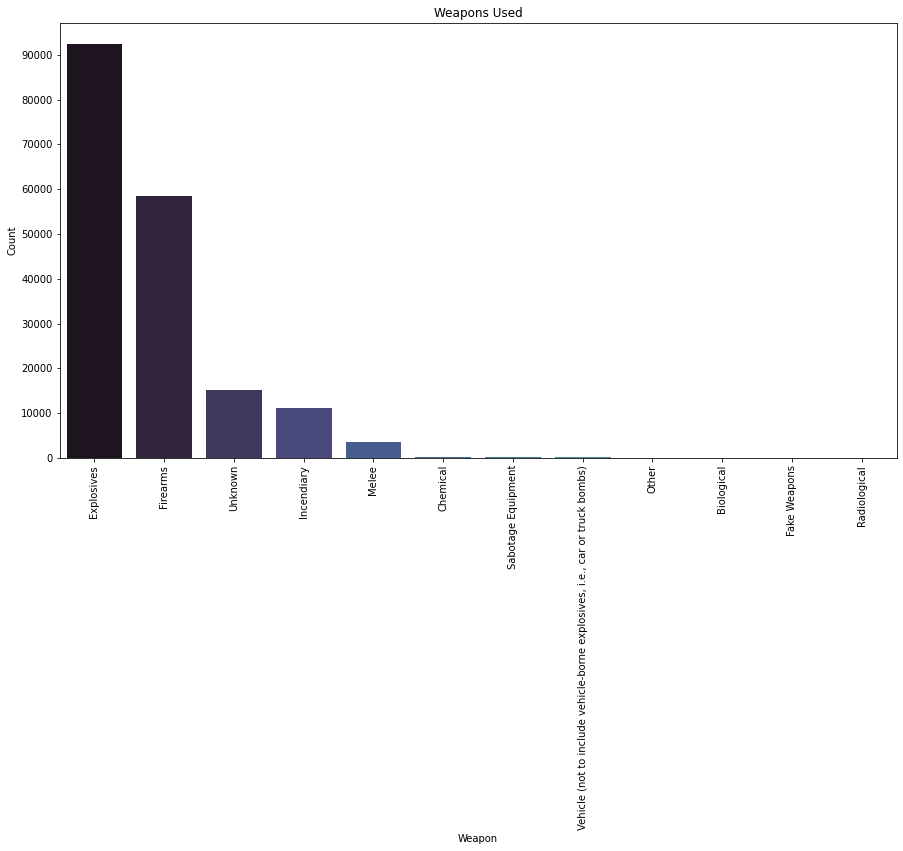

In [122]:
plt.subplots(figsize=(15,8))
sns.barplot(x=weapons.Weapon, y=weapons.Count, palette= 'mako')
plt.xticks(rotation=90)
plt.yticks(range(0,max(weapons.Count)+1,10000))
plt.title('Weapons Used')
plt.show()

#Analyzing Terrorist organization group

In [109]:
#finding casualties caused by each group and which are the top 10 terror organization
global_terror.groupby('Group')['Casualities'].sum().nlargest(10)

Group
Unknown                                        313997.0
Islamic State of Iraq and the Levant (ISIL)     58223.0
Taliban                                         54459.0
Al-Qaida                                        28340.0
Liberation Tigers of Tamil Eelam (LTTE)         20859.0
Boko Haram                                      20305.0
Tehrik-i-Taliban Pakistan (TTP)                 15314.0
Al-Shabaab                                      14541.0
Al-Qaida in Iraq                                14410.0
Shining Path (SL)                               14059.0
Name: Casualities, dtype: float64

In [114]:
#Creating copy of data
terror_group=global_terror.copy()

In [115]:
# removing the rows which contain value 'Unknown' for terror group
terror_group=terror_group[terror_group['Group']!='Unknown']

In [117]:
top_10_terror_group=terror_group.groupby('Group')['Casualities'].sum().nlargest(10)

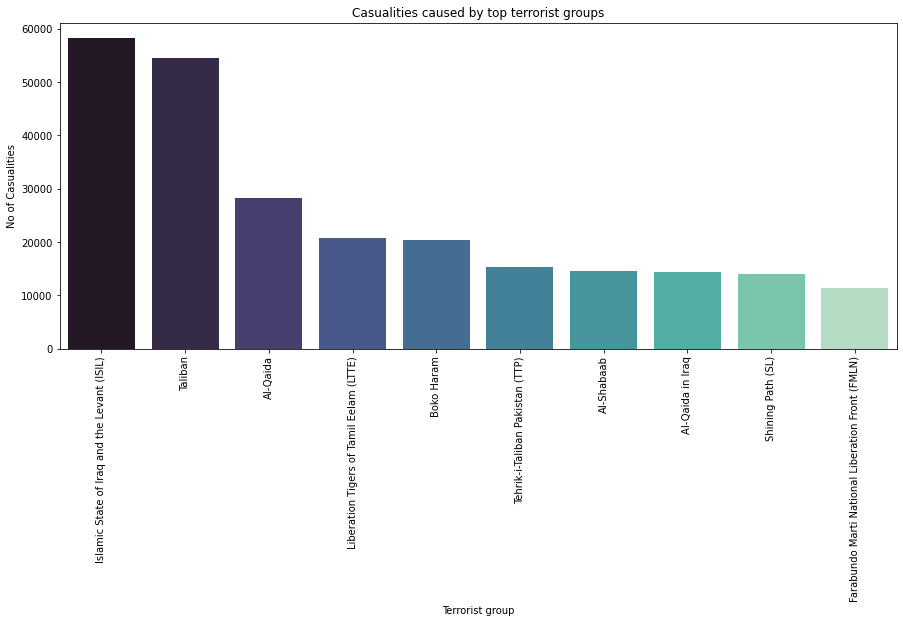

In [121]:
plt.subplots(figsize=(15,6))
sns.barplot(x=top_10_terror_group.index, y=top_10_terror_group.values, palette= 'mako')
plt.xticks(rotation=90)
plt.xlabel('Terrorist group')
plt.ylabel('No of Casualities')
plt.title('Casualities caused by top terrorist groups')
plt.show()